In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from pandas.api.types import CategoricalDtype

In [39]:
CAL_APRIL_2020_POP_ESTIMATE = 39538212
CAL_JULY_2023_POP_ESTIMATE = 38965193

california_data = {
    'Date': pd.date_range(start='2022-01', periods=34, freq='ME'),
    'Total Permits': [8276, 9130, 10883, 10615, 10263, 12675, 7663, 11045, 10242, 7282, 6800, 8220,
                      7138, 8275, 7410, 9186, 10066, 13326, 8190, 12630, 8212, 8338, 9757, 7179,
                      7458, 7745, 7984, 7696, 10442, 9363, 8518, 8905, 7798, 8597],
    'Single Family Units' : [4977, 5213, 7018, 6041, 6022, 6007, 4522, 5637, 4179, 3761, 3203, 3678,
                                3068, 3612, 4608, 4470, 6003, 6776, 4545, 5464, 4359, 4673, 4543, 4534,
                                4757, 4587, 4871, 5638, 6149, 5651, 5165, 5452, 4759, 5007]
}

cal_df = pd.DataFrame(california_data)

cal_df['Date'] = pd.to_datetime(cal_df['Date'])
cal_df['Month'] = cal_df['Date'].dt.strftime('%b')

cal_pop_diff = CAL_JULY_2023_POP_ESTIMATE - CAL_APRIL_2020_POP_ESTIMATE
cal_interpolated_pop_change = cal_pop_diff / 39
cal_estimated_jan_2022_pop = CAL_APRIL_2020_POP_ESTIMATE + (cal_interpolated_pop_change * 21)
cal_populations = [cal_estimated_jan_2022_pop]
for i in range(33):
  cal_populations.append(cal_populations[-1] + cal_interpolated_pop_change)

cal_df['Populations'] = cal_populations

cal_df['Total Permits Per Capita'] = cal_df['Total Permits'] / cal_df['Populations']
cal_df['Total Permits Per 10k'] = cal_df['Total Permits Per Capita'] * 10000

cal_df['Multi-Family Units'] = cal_df['Total Permits'] - cal_df['Single Family Units']
cal_df['Multi-Family Units Per Capita'] = cal_df['Multi-Family Units'] / cal_df['Populations']
cal_df['Multi-Family Units Per 10k'] = cal_df['Multi-Family Units Per Capita'] * 10000
cal_df['% Multi-Family Units'] = (cal_df['Multi-Family Units'] / cal_df['Total Permits']) * 100.0

cal_2022 = cal_df.iloc[:12]
cal_2023 = cal_df.iloc[12:24]
cal_2024 = cal_df.iloc[24:34]

In [55]:
US_OCT_2024_POP_ESTIMATE = 337267348
US_JAN_2022_POP_ESTIMATE = 332682666

us_data = {
    'Date': pd.date_range(start='2022-01', periods=34, freq='ME'),
    'Total Permits': [132316, 131455, 168996, 156589, 148984, 157198, 134413, 138965, 129579, 120838, 102461, 104420,
                      100998, 110878, 131310, 117601, 139585, 135692, 118742, 141799, 116711, 125279, 108831, 104944,
                      114776, 119125, 124318, 132325, 132413, 125656, 126531, 131857, 113534, 125057],
    'Single Family Units' : [83404, 87088, 107357, 98219, 95355, 91515, 75574, 81002, 70813, 65866, 55553, 50172,
                             53062, 58654, 79384, 75123, 88913, 91039, 77815, 88312, 76502, 79781, 69619, 64918,
                             75906, 79446, 85199, 93639, 94071, 83716, 85817, 86050, 76747, 84363]
}

us_df = pd.DataFrame(us_data)
us_pop_diff = US_OCT_2024_POP_ESTIMATE - US_JAN_2022_POP_ESTIMATE
us_interpolated_pop_change = us_pop_diff / 34
us_populations = [US_JAN_2022_POP_ESTIMATE]
for i in range(33):
  us_populations.append(us_populations[-1] + cal_interpolated_pop_change)
us_df['Populations'] = us_populations

us_sans_cal_data = {
    'Date': pd.date_range(start='2022-01', periods=34, freq='ME'),
    'Total Permits' : us_df['Total Permits'] - cal_df['Total Permits'],
    'Single Family Units' : us_df['Single Family Units'] - cal_df['Single Family Units'],
    'Populations' : us_df['Populations'] - cal_df['Populations']
}

us_sans_cal_df = pd.DataFrame(us_sans_cal_data)

us_sans_cal_df['Date'] = pd.to_datetime(us_sans_cal_df['Date'])
us_sans_cal_df['Month'] = us_sans_cal_df['Date'].dt.strftime('%b')

us_sans_cal_df['Total Permits Per Capita'] = us_sans_cal_df['Total Permits'] / us_sans_cal_df['Populations']
us_sans_cal_df['Total Permits Per 10k'] = us_sans_cal_df['Total Permits Per Capita'] * 10000

us_sans_cal_df['Multi-Family Units'] = us_sans_cal_df['Total Permits'] - us_sans_cal_df['Single Family Units']
us_sans_cal_df['Multi-Family Units Per Capita'] = us_sans_cal_df['Multi-Family Units'] / us_sans_cal_df['Populations']
us_sans_cal_df['Multi-Family Units Per 10k'] = us_sans_cal_df['Multi-Family Units Per Capita'] * 10000
us_sans_cal_df['% Multi-Family Units'] = (us_sans_cal_df['Multi-Family Units'] / us_sans_cal_df['Total Permits']) * 100.0

us_sans_cal_2022 = us_sans_cal_df.iloc[:12]
us_sans_cal_2023 = us_sans_cal_df.iloc[12:24]
us_sans_cal_2024 = us_sans_cal_df.iloc[24:34]

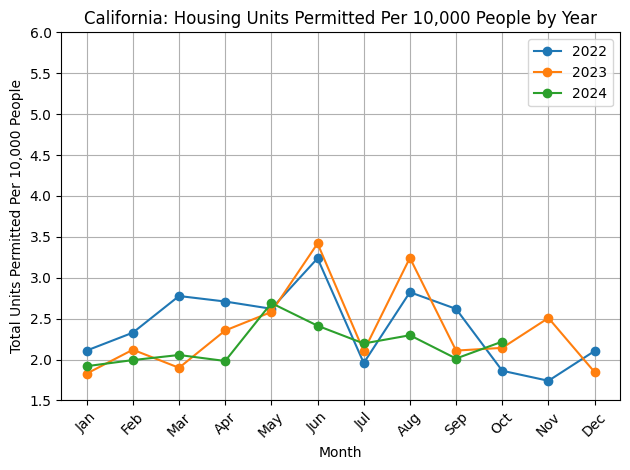

In [51]:
plt.plot(cal_2022['Month'], cal_2022['Total Permits Per 10k'], label='2022', marker='o')
plt.plot(cal_2023['Month'], cal_2023['Total Permits Per 10k'], label='2023', marker='o')
plt.plot(cal_2024['Month'], cal_2024['Total Permits Per 10k'], label='2024', marker='o')

plt.xlabel('Month')
plt.ylabel('Total Units Permitted Per 10,000 People')
plt.title('California: Housing Units Permitted Per 10,000 People by Year')
plt.xticks(rotation=45)
plt.ylim(1.5, 6)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

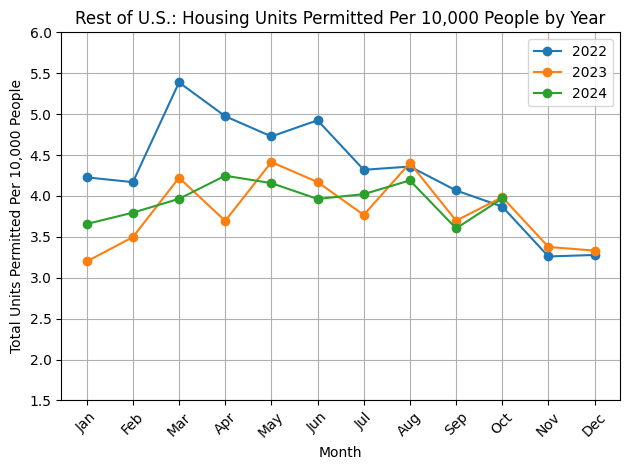

In [56]:
plt.plot(us_sans_cal_2022['Month'], us_sans_cal_2022['Total Permits Per 10k'], label='2022', marker='o')
plt.plot(us_sans_cal_2023['Month'], us_sans_cal_2023['Total Permits Per 10k'], label='2023', marker='o')
plt.plot(us_sans_cal_2024['Month'], us_sans_cal_2024['Total Permits Per 10k'], label='2024', marker='o')

plt.xlabel('Month')
plt.ylabel('Total Units Permitted Per 10,000 People')
plt.title('Rest of U.S.: Housing Units Permitted Per 10,000 People by Year')
plt.xticks(rotation=45)
plt.ylim(1.5, 6)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

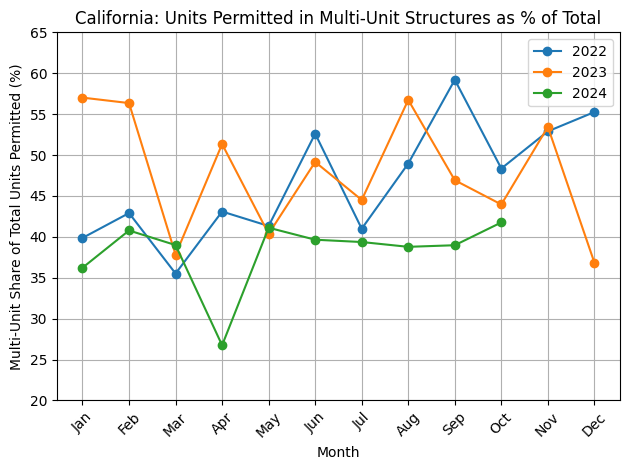

In [73]:
plt.plot(cal_2022['Month'], cal_2022['% Multi-Family Units'], label='2022', marker='o')
plt.plot(cal_2023['Month'], cal_2023['% Multi-Family Units'], label='2023', marker='o')
plt.plot(cal_2024['Month'], cal_2024['% Multi-Family Units'], label='2024', marker='o')

plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Multi-Unit Share of Total Units Permitted (%)')
plt.title('California: Units Permitted in Multi-Unit Structures as % of Total')
plt.ylim(20, 65)
plt.grid(True)
plt.tight_layout()

plt.legend()
plt.show()

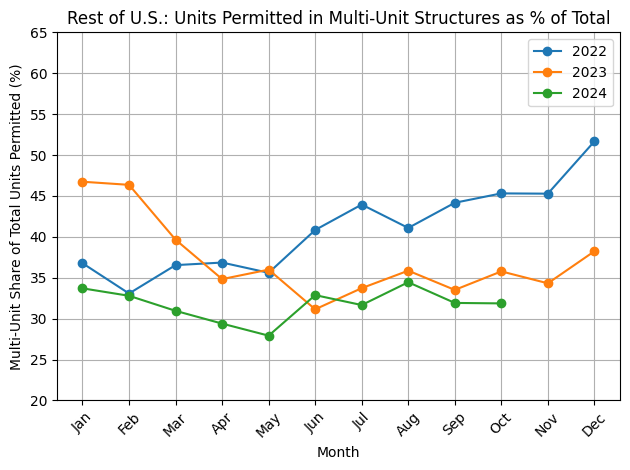

In [74]:
plt.plot(us_sans_cal_2022['Month'], us_sans_cal_2022['% Multi-Family Units'], label='2022', marker='o')
plt.plot(us_sans_cal_2023['Month'], us_sans_cal_2023['% Multi-Family Units'], label='2023', marker='o')
plt.plot(us_sans_cal_2024['Month'], us_sans_cal_2024['% Multi-Family Units'], label='2024', marker='o')

plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Multi-Unit Share of Total Units Permitted (%)')
plt.title('Rest of U.S.: Units Permitted in Multi-Unit Structures as % of Total')
plt.ylim(20, 65)
plt.grid(True)
plt.tight_layout()

plt.legend()
plt.show()